Data before preprocessing:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data after preprocessing:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588 

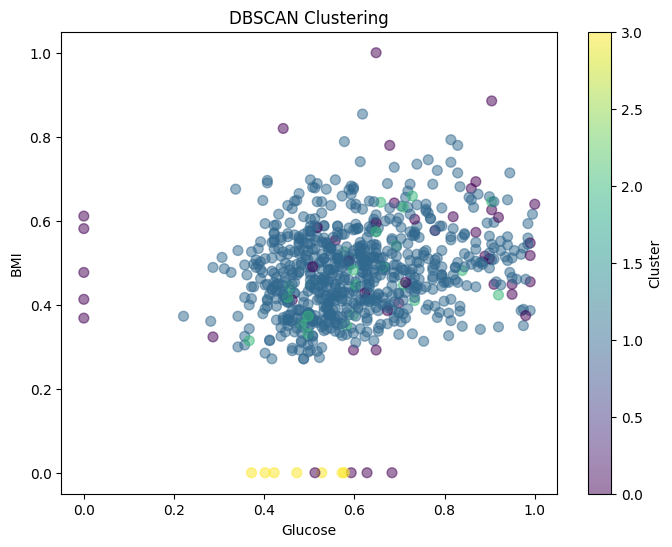

In [35]:
#Using the diabetes.csv dataset previously uploaded in  lab ANN using Keras.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data from the CSV file
df = pd.read_csv("diabetes.csv")

# Before Pre-Processing
print("Data before preprocessing:")
print(df.head())
print()

# Replace null values with 0
df.fillna(0, inplace=True)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical columns except 'Outcome'
df[df.columns[:-1]] = min_max_scaler.fit_transform(df[df.columns[:-1]])


# Before Pre-Processing
print("Data after preprocessing:")
print(df.head())
print()

# DBSCAN implementation
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(data, point_index, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_index], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(data, eps, min_pts):
    clusters = [-1] * len(data)  # Initialize all points as noise (-1)
    cluster_id = 0

    for i in range(len(data)):
        if clusters[i] != -1:
            continue

        neighbors = region_query(data, i, eps)
        if len(neighbors) < min_pts:
            clusters[i] = 0  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(data, clusters, i, neighbors, cluster_id, eps, min_pts)

    return clusters

def expand_cluster(data, clusters, point_index, neighbors, cluster_id, eps, min_pts):
    clusters[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]
        if clusters[neighbor_index] == 0:  # Previously marked as noise
            clusters[neighbor_index] = cluster_id
        elif clusters[neighbor_index] == -1:  # Unvisited
            clusters[neighbor_index] = cluster_id
            new_neighbors = region_query(data, neighbor_index, eps)
            if len(new_neighbors) >= min_pts:
                neighbors += new_neighbors
        i += 1

# Apply DBSCAN on the scaled data
eps = 0.3
min_pts = 5
clusters = dbscan(df[df.columns[:-1]].values, eps, min_pts)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters


# After DBSCAN Implementation
print("Data after preprocessing:")
print(df.head())
print()
print("Plotting Data in Graph")
print()

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()
